In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.metrics import r2_score
import math
import random
from scipy.stats import pearsonr
from statistics import mean
import timeit
from scipy.stats import probplot
sns.set()

In [2]:
data=load_boston()

C:\Users\Bhagwan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset

In [3]:
features=pd.DataFrame(data.data,columns=data.feature_names)
target=pd.DataFrame(data.target,columns=['Target'])
features=features.drop(['TAX','PTRATIO','LSTAT','RAD','NOX','INDUS','AGE'],axis=1)
['ZN', 'INDUS', 'CHAS', 'AGE', 'RAD', 'TAX', 'B']
#features=features.drop(['CRIM', 'ZN', 'CHAS', 'DIS', 'B'],axis=1)
#features=features.drop(['RM'],axis=1)
#'CRIM', 'ZN', 'CHAS', 'RM', 'DIS', 'B'

['ZN', 'INDUS', 'CHAS', 'AGE', 'RAD', 'TAX', 'B']

In [4]:
features

,CRIM,ZN,CHAS,RM,DIS,B
0,0.00632,18.0,0.0,6.575,4.0900,396.90
1,0.02731,0.0,0.0,6.421,4.9671,396.90
2,0.02729,0.0,0.0,7.185,4.9671,392.83
3,0.03237,0.0,0.0,6.998,6.0622,394.63
4,0.06905,0.0,0.0,7.147,6.0622,396.90
...,...,...,...,...,...,...
501,0.06263,0.0,0.0,6.593,2.4786,391.99
502,0.04527,0.0,0.0,6.120,2.2875,396.90
503,0.06076,0.0,0.0,6.976,2.1675,396.90
504,0.10959,0.0,0.0,6.794,2.3889,393.45


In [5]:
from yellowbrick.features import joint_plot
visualizer = joint_plot(features, pd.Series(data.target), columns='RM')

ModuleNotFoundError: No module named 'sklearn.metrics.classification'

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='CRIM', ylabel='DIS'>

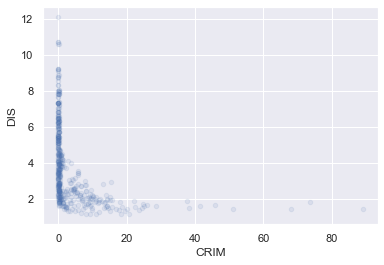

In [6]:
features.plot(kind="scatter", x="CRIM", y="DIS", alpha=0.1)

In [7]:
df=pd.concat([features,target],axis=1)
corr=df.corr()
corr

,CRIM,ZN,CHAS,RM,DIS,B,Target
CRIM,1.000000,-0.200469,-0.055892,-0.219247,-0.379670,-0.385064,-0.388305
ZN,-0.200469,1.000000,-0.042697,0.311991,0.664408,0.175520,0.360445
CHAS,-0.055892,-0.042697,1.000000,0.091251,-0.099176,0.048788,0.175260
RM,-0.219247,0.311991,0.091251,1.000000,0.205246,0.128069,0.695360
DIS,-0.379670,0.664408,-0.099176,0.205246,1.000000,0.291512,0.249929
B,-0.385064,0.175520,0.048788,0.128069,0.291512,1.000000,0.333461
Target,-0.388305,0.360445,0.175260,0.695360,0.249929,0.333461,1.000000


In [8]:
corrs=[abs(corr[attr]['Target']) for attr in list(df)]
#Zip the corrs array with the features array
l=list(zip(corrs,list(features)))
#Now sort the above array by their corr. value in ascending order
l.sort()
#'Unzip' pairs to two lists
#zip(*l) - takes a list that takes like[(a,b,c),(d,e,f)]
#and returns [(a,d),(b,e),(c,f)]
corrs,labels=list(zip((*l)))

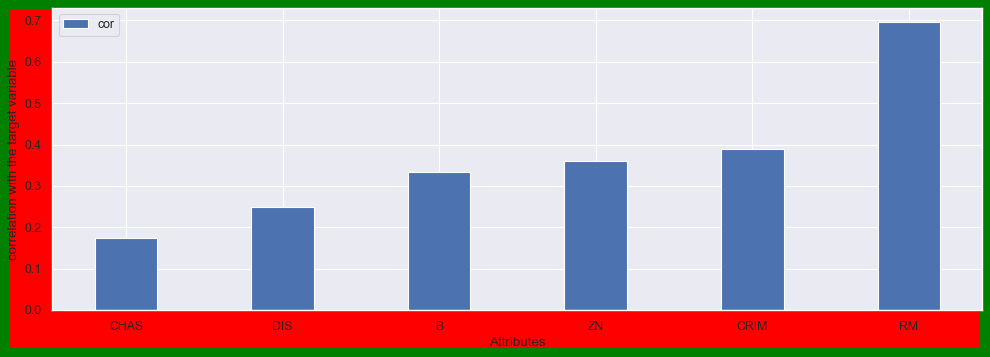

In [9]:
plt.figure(figsize=(15,5),dpi=80,facecolor="red",edgecolor="green",linewidth=18)
plt.bar(labels,corrs,width=0.4)
plt.xlabel('Attributes')
plt.legend(["cor"])
plt.ylabel('correlation with the target variable')
plt.show()

In [ ]:
"""fig,ax=plt.subplots(4,4,figsize=(30,20))
ax[0][0].scatter(features.CRIM,target)
ax[0][1].scatter(features.ZN,target)
ax[0][2].scatter(features.INDUS,target)
#ax[0][3].scatter(features.CHAS,target)
ax[1][0].scatter(features.NOX,target)
ax[1][1].scatter(features.RM,target)
ax[1][2].scatter(features.AGE,target)
ax[1][3].scatter(features.DIS,target)
#ax[2][0].scatter(features.RAD,target)
ax[2][1].scatter(features.TAX,target)
ax[2][2].scatter(features.PTRATIO,target)
ax[2][3].scatter(features.B,target)
ax[3][0].scatter(features.LSTAT,target)"""

In [10]:
xscaler=MinMaxScaler()
X=xscaler.fit_transform(features)
yscaler=MinMaxScaler()
Y=yscaler.fit_transform(target)

In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42,shuffle=False)
ytrain=ytrain.flatten()
ytest=ytest.flatten()

In [ ]:
def summer(x,y,n,mul,m,c):
    su=0
    if(mul==-1):
        for i in range(n):
            su+=(-y[i]+m.dot(x[i]+c))
    else:    
        for i in range(n):
            su+=(-y[i]+m.dot(x[i]+c))*x[i][mul]
    return su/n    

In [ ]:
def error(m,c,x,y):
    n=y.size
    su=0
    for i in range(n):
        su+=(y[i]-m.dot(x[i]+c))**2
    return su/(2*n)

In [ ]:
'''def update(learn,x,c,y,m):
    upd=c-learn*(summer(x,y,y.size,-1,m,c))
    r=np.zeros(len(m))
    for i in range(len(m)):
        r[i]=m[i]-learn*(summer(x,y,y.size,i,m,c))
    #print(r,"r")    
    m=np.copy(r)
    c=upd
    return m,c'''

In [ ]:
def update(learn,x,c,y,m,alpha,penalty):
    #hypothesis
    leny=len(y)
    pred=x.dot(m)+c
    y=y.flatten()
    #print(pred.shape,y.shape)
    loss=pred-y
    #print("loss",loss)
    #print("x=",x)
    #print("transposw",x.T)
    updc=c-learn*(np.sum(loss)/leny)
    if(penalty=="Lasso"):
        m=m-learn*((x.T.dot(loss)+alpha*np.sign(m))/leny)
    elif(penalty=="Ridge"):
        m=m-learn*((x.T.dot(loss)+alpha*m)/leny)
    else:
        m=m-learn*((x.T.dot(loss))/leny)
    c=updc
    return m,c

In [ ]:
def stochastic(m,c,x,y,learn,n_iters):
    mc=[]
    er=[]
    for i in range(n_iters):
        #print(m)
        predicted=x.dot(m)+c
        er.append(mean_squared_error(predicted,y))
        ran=random.randint(0, len(y)-1)
        xran=x[ran]
        yran=y[ran]
        pred=xran.dot(m)+c
        loss=pred-yran
        updc=c-learn*loss
        #print(xran,loss)
        m=m-learn*(xran*loss)
        c=updc
    return m,c,mc,er

In [ ]:
def minibatch(m,c,x,y,learn,n_iters,batch):
    mc=[]
    er=[]
    for i in range(n_iters):
        pred=x.dot(m)+c
        er.append(mean_squared_error(pred,y))
        l=random.sample(range(0,len(y)-1),batch)
        xbatch=x[l]
        ybatch=y[l]
        
        m,c=update(learn,xbatch,c,ybatch,m)
        mc.append(m)
    return m,c,mc,er

In [ ]:
def gradient(m,c,x,y,learn,n_iters,alpha,penalty):
    mc=[]
    er=[]
    for i in range(n_iters):
        #if(alpha>9998):
        #    print(i,m)
        pred=x.dot(m)+c
        er.append(mean_squared_error(pred,y))
        if(i>0):
            if(er[i]>=er[i-1]):
                break
        m,c=update(learn,x,c,y,m,alpha,penalty)
        mc.append([m,c])
    return mc[-1][0],mc[-1][1],mc,er

In [ ]:
n=len(features.columns)
init_m=np.zeros(n)
init_c=0
learn=0.1
#iters=[100,200,300,400,500,700,1000,1500,2000,2500,3000,5000,10000,30000,60000,63486,63487,70000,100000]
#for iterss in iters:
n_iters=2500
batch=32

alpha=0
penalty="NO"
erro=[]
r2=[]
mean_line_err=[]
mean_line_r2=[]
timecal=[]
coef=[]
#alpha=alpha*10
#print("alpha=",alpha)
for j in range(10):
    xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=j*5)
    tic=timeit.default_timer()
    m,c,mc,er=gradient(init_m,init_c,xtrain,ytrain,learn,n_iters,alpha,penalty)
    #m,c,mc,er=stochastic(init_m,init_c,xtrain,ytrain,learn,n_iters)
    #m,c,mc,er=minibatch(init_m,init_c,xtrain,ytrain,learn,n_iters,batch)

    coef.append(m)

    toc=timeit.default_timer()
    timecal.append(toc-tic)
    ypred=np.zeros(len(ytest))
    ypred=xtest.dot(m)+c
    #if(alpha>9998):
    #    print(m,c)
    #    print(ypred)
    r2.append(r2_score(ypred,ytest))
    erro.append(mean_squared_error(ypred,ytest))
    ytest=ytest.flatten()
    k=mean(ytest)
    ypredmean=np.array([k]*len(ytest))
    mean_line_r2.append(r2_score(ytest,ypredmean))
    mean_line_err.append(mean_squared_error(ytest,ypredmean))

    #print("executing",j)
    pear=pearsonr(ypred,ytest)
    err=ypred-ytest
    mean_of_residuals=np.mean(err)
    #print("mean of residuals is ",mean_of_residuals)

    #DURBIN_WATSON_TEST for autocorrelation
    '''count_numerator=0
    count_denominator=err[0]**2
    for i in range(1,len(err)):
        count_numerator+=(err[i]-err[i-1])**2
        count_denominator+=(err[i])**2
    durbin_coefficient=count_numerator/count_denominator
    print("autocorrelation coefficient=",durbin_coefficient)'''


    #reidual vs feature for residual plot
    #plt.scatter(err,xtest)
    #plt.show()

    #residual vs predicted plot for homoscedasticity
    '''plt.scatter(ypred,err)
    plt.plot([-0.5,1],[0,0])
    plt.show()'''

    #for checking normaity
    #probplot(err,fit=True,plot=plt)
    #plt.show()

    #distplot for checking normalllity and mean is zero
    #sns.distplot(err)
    #plt.show()

    '''plt.scatter(xtest,err)
    plt.plot([1,0],[1,0])
    plt.show()
    '''
    #regression line and mean line plot
    '''print("r2=",r2[j])
    print("meansquared=",erro[j])
    print("r2mean=",mean_line_r2[j])
    print('errormean=',mean_line_err[j])
    print("correlation_coeffiecient and its square=",pear[0],pear[0]*pear[0])
    print("manually r sqquare=",1-(erro[j]/mean_line_err[j]))
    print("sum of residuals",np.sum(ypred-ytest))
    print()'''
    #plt.scatter(xtest,ytest)
    #plt.plot(xtest,ypredmean)
    #plt.plot(xtest,ypred)
    #plt.show()

    #plot of error over iterations
    #plt.scatter(np.arange(1,n_iters+1,1),er)
    #plt.show()

#coefficients
coef=np.array(coef).T
meancoef=[]
for i in coef:
    meancoef.append(mean(i))
print("coefficient for",n_iters,"is",meancoef)

#errors
errmean=mean(erro)
r2mean=mean(r2)
errmeanline=mean(mean_line_err)
r2meanline=mean(mean_line_r2)
print(errmean,r2mean,mean(timecal))#,errmeanline,r2meanline

In [ ]:
'''50k=    0.017607268016505518
60k=    0.01760726801651795
62k=    0.01760726801651803
63k=    0.01760726801651805
63200=  0.017607268016518053
63300=  0.01760726801651806
63400=  0.01760726801651806
63450=  0.01760726801651806
63460=  0.01760726801651806
63486=  0.01760726801651806
63487=  0.017607268016518064
63500=  0.017607268016518064
64k=    0.017607268016518064
65k=    0.017607268016518064
70k=    0.017607268016518064
80k=    0.017607268016518064
90k=    0.017607268016518064
1 lakh= 0.017607268016518064
2 lakh= 0.017607268016518064
5 lakh= 0.017607268016518064
10lakh= 0.017607268016518064
50lakh=  0.017607268016518064'''

In [ ]:
from sklearn.linear_model import Ridge
alpha=0.00000000000000000000001
while(alpha<1000000000000000000000000000000000000000000):
    print("alpha=",alpha)
    alpha=alpha*10
    model=Ridge(alpha=alpha,max_iter=2500)
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print(model.coef_,model.intercept_)
    print(mean_squared_error(ypred,ytest))
    print()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
model1=SGDRegressor(learning_rate='adaptive',eta0=0.1)
model2=LinearRegression()
model1.fit(xtrain,ytrain)
model2.fit(xtrain,ytrain)
pred1=model1.predict(xtest)
pred2=model2.predict(xtest)
mean_squared_error(pred1,ytest),mean_squared_error(pred2,ytest)

In [ ]:
function = lambda x: (x ** 3)-(3 *(x ** 2))+7

#Get 1000 evenly spaced numbers between -1 and 3 (arbitratil chosen to ensure steep curve)
x = np.linspace(-1,3,500)

#Plot the curve
plt.plot(x, function(x))

In [ ]:
'''err=mean_squared_error(ypred,ytest)
r2_score(ypred,ytest)'''

In [ ]:
ypred=yscaler.inverse_transform(ypred.reshape(-1,1))
ypred=ypred.flatten()
ytest=yscaler.inverse_transform(ytest.reshape(-1,1))
ytest=ytest.flatten()
err=mean_squared_error(ypred,ytest)
err

In [ ]:
'''k=mean(ytest)
k
ypredmean=np.array([k]*len(ytest))
r2_score(ytest,ypredmean)
mean_squared_error(ytest,ypredmean)'''

In [ ]:
plt.scatter(xtest,ytest)
#plt.scatter(xtest[:,1:2],ytest)
#plt.scatter(xtest[:,2:3],ytest)
#plt.scatter(xtest[:,3:4],ytest)
#plt.scatter(xtest[:,5:6],ytest)
#plt.scatter(xtest[:,4:5],ytest)
plt.plot(xtest,ypredmean)
plt.plot(xtest,ypred)
#plt.plot(xtest[:,2:3],ypred)
#plt.plot(xtest[:,3:4],ypred)
#plt.plot(xtest[:,5:6],ypred)
#plt.plot(xtest[:,4:5],ypred)
n_iters,r2mean,errmean,r2meanline,errmeanline

In [ ]:
from sklearn.linear_model import SGDRegressor
model=SGDRegressor()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
loss=ypred-ytest
np.mean(loss)

In [ ]:
from yellowbrick.datasets import load_concrete
from yellowbrick.features import JointPlotVisualizer

# Load the dataset
X, y = load_concrete()


In [ ]:
plt.scatter(ypred,err)
plt.plot(np.arange(0,45,1),np.array([0]*45),'g-')

In [ ]:
a=[3,4,5]
k=np.array([[1,2],[3,4],[5,6],[7,8],[9,10],11,12,13])
b=k[a]
b

In [ ]:
a=np.array([2,3,4])
b=np.array([3])
a*b

In [ ]:
a=np.array([[1,2,3,4],[5,6,7,8]])
k=a.T
m=[]
for i in k:
    m.append(mean(i))
m

In [ ]:
for i in range(10):
    print(2.6*i)

In [ ]:
k=[[1,2],[3,4]]
k[-1][0]

In [ ]:
m=[1,1,1]
k,c=np.unique(m,return_counts=True)
k,c